In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [22]:
image_path = "frutas.webp"
image = Image.open(image_path)
image_np = np.array(image)

In [23]:
#Redimensionar la imagen a un array 2D de píxeles y 3 valores de color (RGB)
pixels = image_np.reshape(-1, 3)

#Aplicar K-means clustering para segmentar la imagen
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters por simplicidad
kmeans.fit(pixels)

#Reemplazar cada valor de píxel con su valor de centroide correspondiente
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image_np.shape)

#Convertir a uint8 para mostrar correctamente la imagen
segmented_img = segmented_img.astype(np.uint8)

In [24]:
import cv2 as cv2
pixels_cv = np.float32(pixels)

# Definir criterios para el algoritmo (tipo de terminación, iteraciones máximas, precisión requerida)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Aplicar kmeans de OpenCV
k = 5  # Número de clusters
_, labels, centers = cv2.kmeans(pixels_cv, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [25]:
# Convertir los centros de nuevo a uint8 (rango 0-255) y mapear las etiquetas a los colores correspondientes
centers = np.uint8(centers)
segmented_img_cv = centers[labels.flatten()]
segmented_img_cv = segmented_img_cv.reshape(image_np.shape)

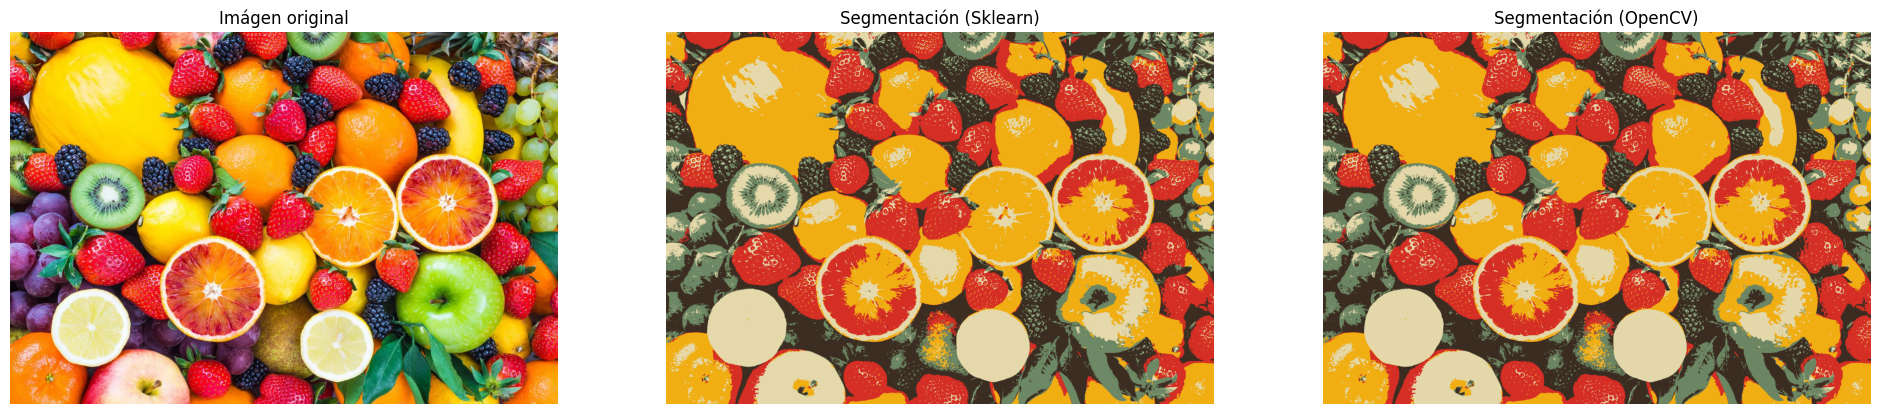

In [27]:
# Ajustar el tamaño de las imágenes para que se vean más grandes
plt.figure(figsize=(24, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title('Imágen original')
plt.axis('off')

# Imagen segmentada con Sklearn
plt.subplot(1, 3, 2)
plt.imshow(segmented_img)
plt.title('Segmentación (Sklearn)')
plt.axis('off')

# Imagen segmentada con OpenCV
plt.subplot(1, 3, 3)
plt.imshow(segmented_img_cv)
plt.title('Segmentación (OpenCV)')
plt.axis('off')

plt.show()